# Loading the model

In [1]:
from keras.models import load_model
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('model.h5')

model = loaded_model


print('Model successfully loaded')

Using TensorFlow backend.
W0727 17:04:04.286929 4592203200 deprecation_wrapper.py:119] From /Users/srijansharma/Desktop/Digital Document Text Extractiong/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0727 17:04:04.325370 4592203200 deprecation_wrapper.py:119] From /Users/srijansharma/Desktop/Digital Document Text Extractiong/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 17:04:04.349605 4592203200 deprecation_wrapper.py:119] From /Users/srijansharma/Desktop/Digital Document Text Extractiong/env/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0727 17:04:04.375742 4592203200 deprecation_wrapper.py:119] From /Users/srijansharma/Desktop/Digital Docume

Model successfully loaded


(57, 524, 3)


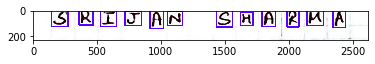

In [118]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
image = cv2.imread('name_goodinput.jpg')
print(image.shape)
height, width, depth = image.shape

#resizing the image to find spaces better
image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


#dilation
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)


#adding GaussianBlur
gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


#find contours
ctrs, hier = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

m = list()
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
pchl = list()

pred_images = list()
dp = image.copy()

for i, ctr in enumerate(sorted_ctrs):
    if(cv2.contourArea(ctr) < 500):
        continue        
    ctrs = ctr
    x, y, w, h = cv2.boundingRect(ctr)
    roi = image[y:y+h, x:x+w]
    pred_images.append(roi)
    cv2.imwrite(os.path.join("./output/","roi" + str(i) + ".png"), roi)
    cv2.rectangle(dp,(x-10,y-10),( x + w + 10, y + h + 10 ),(90,0,255),9)
plt.imshow(dp)

In [119]:
#MAKING PREDICTIONS FOR EACH CHARACTER
predictions = list()
for img in pred_images:
    roi = img
    roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
    roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    roi = np.array(roi)
    t = np.copy(roi)
    t = t / 255.0
    t = 1-t
    t = t.reshape(1,784)
    pred = model.predict_classes(t)
    predictions.append(characters[pred[0]])
print(predictions)

['S', 'R', 'I', 'J', 'A', 'N', 'S', 'M', 'A', 'R', 'M', 'A']


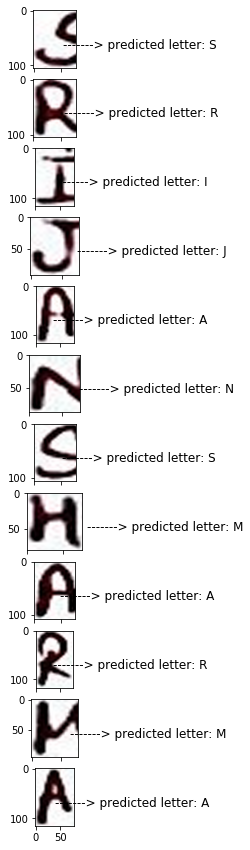

Predicted String: SRIJANSMARMA


In [120]:
pcw = list()
interp = 'bilinear'
fig, axs = plt.subplots(nrows=len(pred_images), sharex=True, figsize=(1,len(sorted_ctrs)))
for i in range(len(predictions)):
    pcw.append(predictions[i])
    axs[i].set_title('-------> predicted letter: '+predictions[i], x=2.5,y=0.24)
    axs[i].imshow(pred_images[i], interpolation=interp)

plt.show()

predstring = ''.join(pcw)
print('Predicted String: '+predstring)